<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_2223/blob/main/Web%20scraping%20%26%20API/Web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Web Scraping with *requests* and *BeautifulSoup*

Web scraping refers to extraction of data from websites. This tutorial will use one example to show you how to extract information from one website and some summarisation of the best practice.

## 1. Understand HTML page structure
Before you scrape the data from the website, one key thing is that you inspect the HTML page you are targeting and know how to identify that parts that you want to scrape. Thus, it is very important to have some understanding of the HTML page structure before learning about web scraping.

Hypertext Markup Language (HTML) is the standard markup language for creating Web pages. HTML describes the structure of a web page.


HTML consists of a series of elements that "tell" to the browser how to display the content. HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc. using tags.

The following is a simple example of HTML document:

`<!DOCTYPE html>`

`<html>`

`<head>`

`<title>`Page Title`</title>`

`</head>`

`<body>`

`<h1>`My First Heading`</h1>`

`<p>`My first paragraph.`</p>`

`</body>`

`</html>`


Here explains the tags: 

The `<!DOCTYPE html>` declaration defines this document is an HTML5 document.

The`<html>` element is the root element of an HTML page.

The `<head>` element contains meta information about the HTML page

The `<title>` element specifies a title for the HTML page.

The `<body>` element contains the visible page content, such as headings, paragraphs, images, hyperlinks, tables, lists, etc.

The `<h1>` element defines a large heading.

The `<p>` element defines a paragraph.

The `<a>` element defines a hyperlink.

Sometimes, there will be `<div>` tag which defines a division or a section in an HTML document. It's usually a container for other elements.

HTML tags normally come in pairs like `<p>` and `</p>`. Between two tags there will be the content. For example, in this case, in between `<p>` and `</p>`, there will the content of the paragraph which will be shown in the browser.

Thus, before you scrape a website. You need to inspect the page (shift+ctrl+I in windows chrome) and see which part you want the information from and what tags they are having so you have some ideas about defining the elements while scraping the data.


Next we will use example to show you how to scrape data from a website.

##2. Web Scraping with `requests` and `BeautifulSoup`

What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content. Basically, we make request to retrive content from an HTML page, and then parse  the whole HTML page using BeautifulSoup ("put into the soup"). After that, we will be able to find and extract the exact content we want from the soup by HTML tags. The below picture shows how it works:
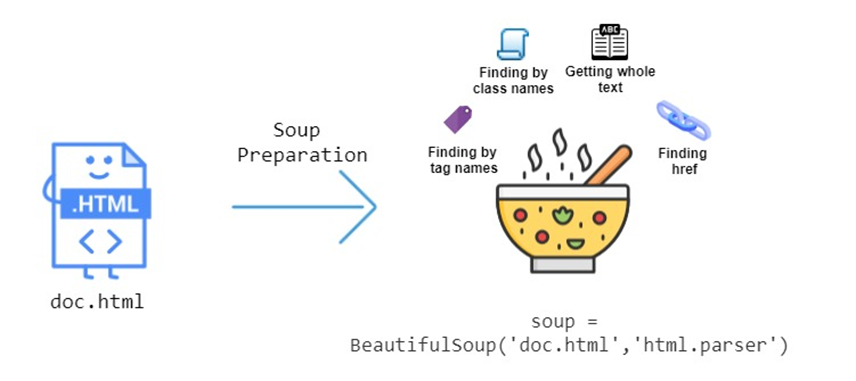

###Step 1: Import packages 

In [ ]:
# import packages

import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup


###Step 2: Make the request to the website.
Here we are extracting information from the world renowned website www.p-tech.org.uk.

In [ ]:
url = 'http://ptechweb.s3-website.us-east-2.amazonaws.com'
# Use requests to retrieve data from a given URL
response = requests.get(url)

In [ ]:
#here we can check whether we have retrived content successfully
print(response.text[:500])

<!DOCTYPE html>
<!--[if IE 9 ]> <html lang="en-US" class="ie9 loading-site no-js"> <![endif]-->
<!--[if IE 8 ]> <html lang="en-US" class="ie8 loading-site no-js"> <![endif]-->
<!--[if (gte IE 9)|!(IE)]><!--><html lang="en-US" class="loading-site no-js"> <!--<![endif]-->
<head>
<meta charset="UTF-8"/>
<link rel="profile" href="http://gmpg.org/xfn/11"/>
<link rel="pingback" href="xmlrpc.php.html"/>
<script>(function(html){html.className = html.className.replace(/\bno-js\b/,'js')})(document.documen


###Step 3: Parse the HTML page using BeautifulSoup

In [ ]:
# Parse the whole HTML page using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Title of the parsed page
soup.title

<title>Digital Marketing and IT Consultancy, Digital Marketing Training, Coventry - Warwickshire - West Midlands</title>

In [ ]:
# We can also get it without the HTML tags
soup.title.string

'Digital Marketing and IT Consultancy, Digital Marketing Training, Coventry - Warwickshire - West Midlands'

###Step 4: We can start extract information we need from the website

In [ ]:
# For example, we can try extracting all the h1 tags
ptech_h1 = soup.find_all('h1')
print(ptech_h1)

[<h1>Digital Marketing Consultancy</h1>, <h1>Paid Advertising Training</h1>, <h1>International Marketing</h1>, <h1>Google Analytics Training</h1>]


In [ ]:
# We can also try extracting h4 tags by specifying a particular CSS class ('thin-font')and only return text
ptech_tag = soup.find_all('h4', class_='thin-font')

for each in ptech_tag: 
    print(str(each.get_text()))

Need to understand your online marketing?
Google Adwords & Facebook Advertising
Are you looking to Export?
Learn how to reach new markets.
Get started with Analytics, understand the data


Congratulations! It seems all work. Next, let's try something more complicated and might be more meaningful for you. 

We are going to extract information from "About us" from http://ptechweb.s3-website.us-east-2.amazonaws.com/. If you look at the website, you will see there are two blocks in the "About us" sections, which means we need to go into two pages: http://ptechweb.s3-website.us-east-2.amazonaws.com/about-us/clients/ and http://ptechweb.s3-website.us-east-2.amazonaws.com/about-us/staff/ to get information about the clients and the staff information. 

In order get both information, we need to loop between two web pages (the suffixes list below). Here we are aiming to get the H1 tags and the content.

In [ ]:
uri = 'http://ptechweb.s3-website.us-east-2.amazonaws.com/about-us/'
suffixes = [ 'clients','staff'] # add the rest in here
h1heading = []
for suffix in suffixes:
  
  # loop through the suffixes list
  ptech_webscrape = uri + suffix # concatenate the URL and the suffix in the current loop
  r = requests.get(ptech_webscrape)
  page_html = BeautifulSoup(r.text, 'html.parser')
  h1name = page_html.find_all('h1')[0].text
  h1heading.append(h1name)

In [ ]:
h1heading

['Our Clients', 'Our Staff']

In [ ]:
uri = 'http://ptechweb.s3-website.us-east-2.amazonaws.com/about-us/'
suffixes = [ 'clients','staff'] # add the rest in here
h1heading = []
text = []
for suffix in suffixes:
  
  # loop through the suffixes list
  ptech_webscrape = uri + suffix # concatenate the URL and the suffix in the current loop
  r = requests.get(ptech_webscrape)
  page_html = BeautifulSoup(r.text, 'html.parser')
  h1name = page_html.find_all('h1')[0].text
  h1heading.append(h1name)
  para = page_html.find_all("p")[:-3]
  all_text = [''.join(p.text) for p in para]
  text.append(all_text)

In [ ]:
text

[['We have delivered our services to a wide range of clients over the past 10 years, including business start-ups and Global organisations. Â\xa0What ever the type of business you’re running, we are confident that we can provided the skills and support required to take your business to the next level.',
  'Our clients, whether they be training attendees or consultancy clients have all seen results as a result of our interventions.',
  'Some of the sectors we’ve supported / delivered for include:',
  'Our consultants bring a depth of knowledge to your business ensuring bespoke and tailored solutions.'],
 ['p-Tech Ltd make use of both staff and associates to deliver e-business projects to a wide range of customers. Â\xa0With the nature of the work undertaken by the business we aim to provide consultants that provide practical knowledge transfer and solid training to our customers.',
  'The principal consultant within the business is James Pennington. Â\xa0He leads a dedicated team of sup

Next, we will put all the codes together and create a dataframe to put all the information we got. Finally you will note we use the time module in order to make the script wait - via sleep( ). This is good practice when scraping websites as a script can make a lot of requests very quickly and overload the website server. We sleep for a random time just for fun. We also time the whole process using the Notebook function %%time.

In [ ]:
%%time

from random import randint
from time import sleep

uri = 'http://ptechweb.s3-website.us-east-2.amazonaws.com/about-us/'
suffixes = [ 'clients','staff'] # add the rest in here
h1heading = []
text = []

for suffix in suffixes:
  
  # loop through the suffixes list
  ptech_webscrape = uri + suffix # concatenate the URL and the suffix in the current loop
  r = requests.get(ptech_webscrape)
  page_html = BeautifulSoup(r.text, 'html.parser')
  h1name = page_html.find_all('h1')[0].text
  h1heading.append(h1name)
  para = page_html.find_all("p")[:-3]
  all_text = [''.join(p.text) for p in para]
  text.append(all_text)
  
  sleep(randint(1,3))

CPU times: user 201 ms, sys: 3.94 ms, total: 205 ms
Wall time: 6.57 s


In [ ]:
import pandas as pd
df = pd.DataFrame({'title':h1heading,'text':text},columns=['title','text'])
df

,title,text
0,Our Clients,[We have delivered our services to a wide rang...
1,Our Staff,[p-Tech Ltd make use of both staff and associa...


That's it! We have scraped something from a website :)

### Next, let's try to get the top movies from imdb.
We have found that imdb has listed the top 250 films in this page:http://www.imdb.com/chart/top. Our aim is to get all the information from this table including title, cast, rating and number of ratings.

In [ ]:
# Define the IMDB page where we want to get the top movie information
imdb_url = 'http://www.imdb.com/chart/top'

This is how the page looks like:

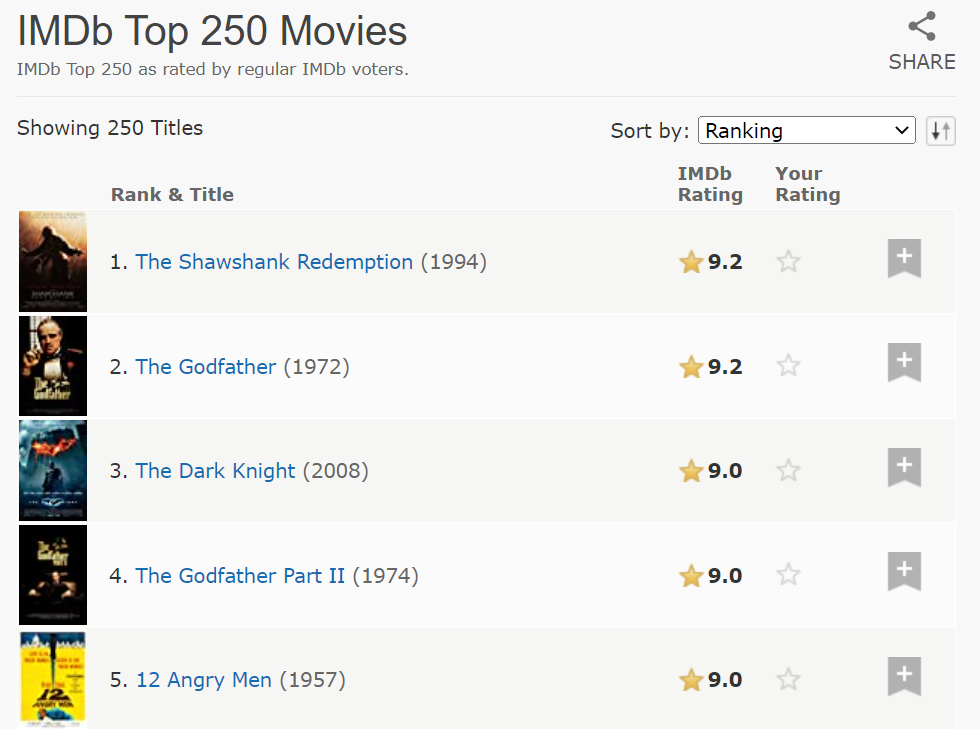

Same steps: make request and parge the page. check the title to make sure we have got the right page.

In [ ]:
# Use requests to retrieve data from a given URL
imdb_response = requests.get(imdb_url)

# Parse the whole HTML page using BeautifulSoup
imdb_soup = BeautifulSoup(imdb_response.text, 'lxml')

# Title of the parsed page
imdb_soup.title

<title>Top 250 Movies - IMDb</title>

Next we need to inspect the page (shift+ctrl+i). First, We can see this is a table in the page, as shown below: `<table>...</table>`
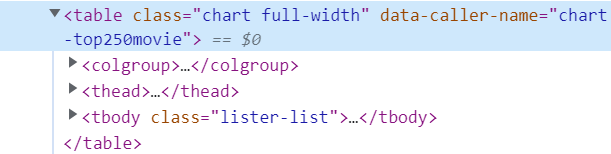

Normally, we can extract this exact table by "table" tag and take the header and data by thead and tbody and then join them together in one data frame. But in this case, it is slightly different since the displayed table has limited information and we want more, such as the links of the movie and the number of ratings, which are not shown in the table explicitly but we can see from the html inspection. 

The good thing is that they are using the same class name for each column. The class name for "title" is "titleColumn" and "rating" is "ratingColumn.imdbRating", and they are all under the `<td>`tag.

Thus, we are going to find the data using these two defined class name.

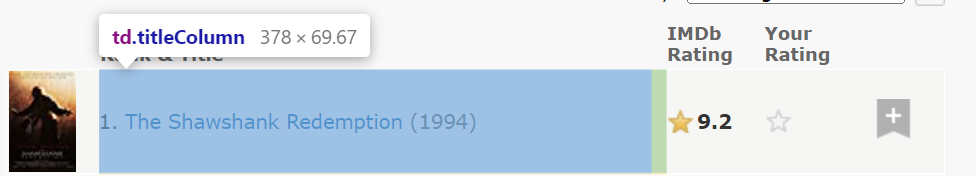
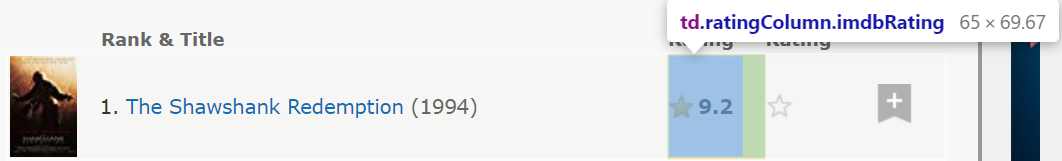

Here, from the below screenshot of td.titleColumn, we can see the title of the movie is available under `<a>`tag, published year under `<span>`tag and the link is under `<a>`tag as well as attribute `href`. Besides, we also find that the cast is avaible under this tag as well as attribute `title`. 

This is great that we found four parts of data we need from td.titleColumn. The below is the list of elements and the according data:


movie_title: td.titleColumn.a, text

movie_year: td.titleColumn.span, text

movie_link: td.titleColumn.a, href

movie_cast: td.titleColumn.a, title

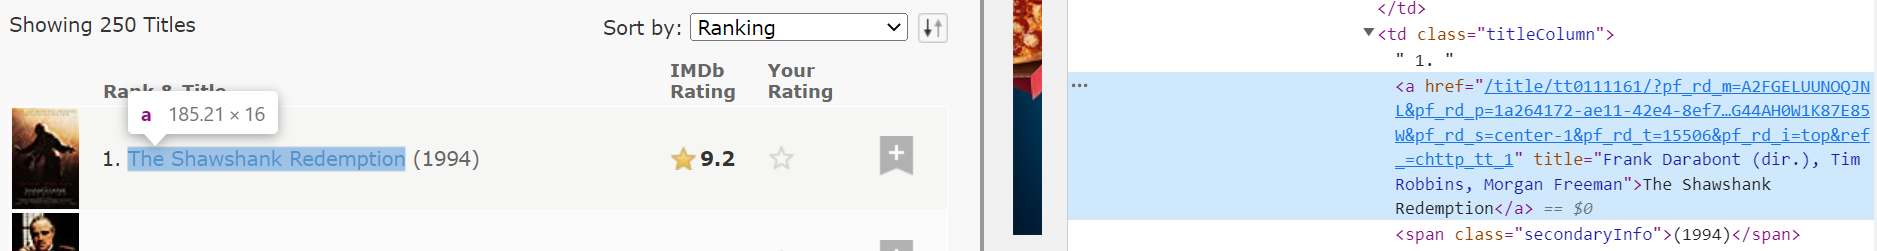

Next, let's try to get the data.

In [ ]:
# We are using soup.select()to find all the data by defined element
# Generally soup.select() method can be used to locate all elements of a particular CSS class (in this case "titleColumn" is the class). 
# You can find elements by attr, ID, etc. 
movie_title = [a.text for a in imdb_soup.select('td.titleColumn a')]
movie_year = [a.text for a in imdb_soup.select('td.titleColumn span')]
movie_link = [a.attrs.get('href') for a in imdb_soup.select('td.titleColumn a')]
movie_cast = [a.attrs.get('title') for a in imdb_soup.select('td.titleColumn a')]

# We are using list comprehension here and it is the same as for loop. since there are different rows we need to loop between rows.

In [ ]:
# we can check our data and see whether they are all good
[movie_title[0], movie_year[0], movie_link[0], movie_cast[0]]

['The Shawshank Redemption',
 '(1994)',
 '/title/tt0111161/',
 'Frank Darabont (dir.), Tim Robbins, Morgan Freeman']

Yes, so we have got the title, year, link and cast. Next, we are going to get the rating scores and the number of rating. Let's inspect the page again and find twhere we can find the rating and the number of ratings.

From the below screenshot, we can see the rating score is easy to find. It is under the `<strong>`tag as text. But the number of ratings is a bit tricky since it appears as attribute `title` and inside a string. The good thing is that they are following the same sentence structure, so we can split the string and take the third value, which is exactly what we need.

Here is the list of the elements where are getting rating data:

movie_rating: td.ratingColumn.imdbRating.strong, text

number_of_rating: td.ratingColumn.imdbRating.strong, title

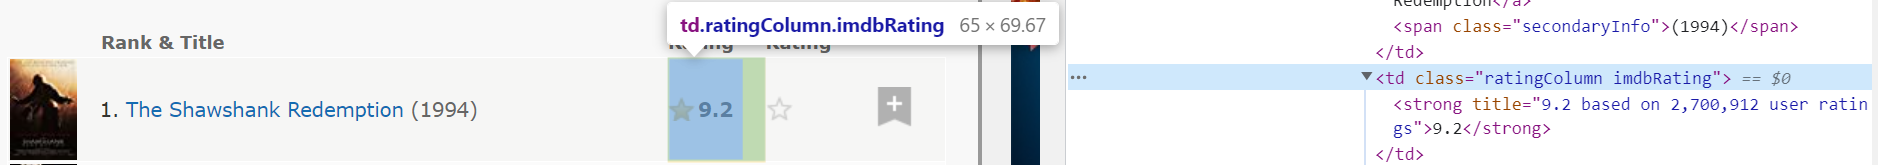

Okay, let's get the data.

In [ ]:
# We use similar approach to get the rating as above.
movie_rating = [b.strong.text for b in imdb_soup.select('td.ratingColumn.imdbRating')]
number_of_rating = [b.attrs.get('title').split()[3] for b in imdb_soup.select('td.ratingColumn.imdbRating strong')]

Actually, the rating and number of ratings are also available in poster (movie picture) column, which is defined as class "posterColumn". As the screenshot shown below, there are some data available under the `<span>` tag. The name `nv` means number of votes, that is, number of ratings. And the name `ir` is the movie rating score. So, alternatively, we can get data through this way.



In [ ]:
#here we can also take the data from other section. just define the element. 

ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=nv]')]

Well done! Here we got all the data we need, and our next job is to put them together into a dataframe.

In [ ]:
#after we get all the data in lists, we can transform them into dataframe which can be checked easily in a table.
top_movies = pd.DataFrame({'Movie_title':movie_title, 'Year':movie_year,'Link': movie_link, 'Cast': movie_cast, 'Rating': movie_rating, 'Rating_counts': number_of_rating})

In [ ]:
top_movies.head()

,Movie_title,Year,Link,Cast,Rating,Rating_counts
0,The Shawshank Redemption,(1994),/title/tt0111161/,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.2,"2,701,289"
1,The Godfather,(1972),/title/tt0068646/,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.2,"1,875,256"
2,The Dark Knight,(2008),/title/tt0468569/,"Christopher Nolan (dir.), Christian Bale, Heat...",9.0,"2,675,102"
3,The Godfather Part II,(1974),/title/tt0071562/,"Francis Ford Coppola (dir.), Al Pacino, Robert...",9.0,"1,281,228"
4,12 Angry Men,(1957),/title/tt0050083/,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",9.0,"797,897"


Great! We have done it! You can download the data as well.

In [ ]:
from google.colab import files
top_movies.to_csv('top_movies.csv')
files.download('top_movies.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exercise

Scrape the main table of [UK's Yearly Box Office](https://www.boxofficemojo.com/intl/uk/yearly/) and try to answer the following:
1. Which producers have the most films in the top 100? 
2. Can you find the gross earnings by distributor?

[Link to solution.](https://colab.research.google.com/drive/14Izp9DBCKs9948hF11JCfGys7zpX0jnx?usp=sharing)